## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
merge_df
# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
mice_count=len(merge_df["Mouse ID"].unique())
mice_count


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_df=merge_df[merge_df.duplicated(['Mouse ID','Timepoint'])]
dup_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df.drop(merge_df[merge_df['Mouse ID'] == 'g989'].index, inplace = False) 
clean_df.head()
clean2_df=clean_df.copy()
clean2_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_count2=len(clean_df["Mouse ID"].unique())
mice_count2

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Regimen_stats=clean_df.groupby(["Drug Regimen"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Regimen_mean=Regimen_stats["Tumor Volume (mm3)"].mean()
Regimen_mean

Regimen_median=Regimen_stats["Tumor Volume (mm3)"].median()
Regimen_median

Regimen_var=Regimen_stats["Tumor Volume (mm3)"].var()
Regimen_var

Regimen_std=Regimen_stats["Tumor Volume (mm3)"].std()
Regimen_std

Regimen_sem=Regimen_stats["Tumor Volume (mm3)"].sem()
Regimen_sem

# Assemble the resulting series into a single summary dataframe.
stats_df = pd.concat({"Mean Tumor Volume":Regimen_mean,"Median Tumor Volume":Regimen_median,"Tumor Volume Variance":Regimen_var,
                      "Tumor Volume Std. Dev.":Regimen_std,"Tumor Volume SEM":Regimen_sem}, axis=1)
stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
#clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median','var','std','sem']})
stats2_df=clean_df.groupby('Drug Regimen').agg(Mean_Tumor_Volume=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="mean"),
                                     Median_Tumor_Volume=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="median"),
                                    Variance_Tumor_Volume=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="var"),
                                    Std_Dev_Tumor_Volume=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="std"),
                                    SEM_Tumor_Volume=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="sem"))
stats2_df
 

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance_Tumor_Volume,Std_Dev_Tumor_Volume,SEM_Tumor_Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

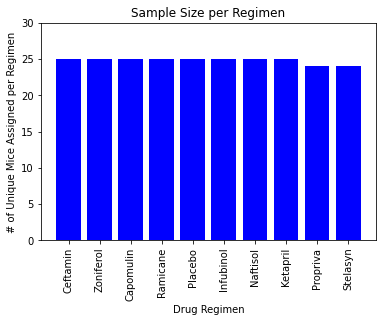

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas. (note dif from readme)
mice = clean_df.drop_duplicates(subset='Mouse ID', keep="first")
mice_regimen=mice['Drug Regimen'].value_counts()
x_axis=mice_regimen.index
y_axis=mice_regimen.values
plt.bar(x_axis, y_axis, color='b',  align="center")
plt.xticks(rotation="vertical")
plt.ylim(0,30)
plt.title("Sample Size per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Unique Mice Assigned per Regimen")
plt.savefig("../images/unique_mice_per_regimen.png")
plt.show()

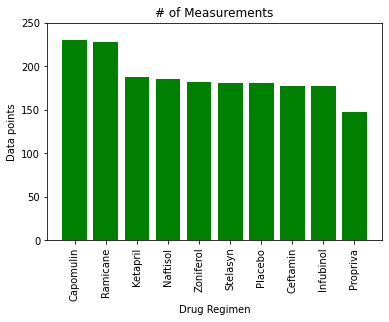

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
data_points=clean_df['Drug Regimen'].value_counts()
x_axis=data_points.index
y_axis=data_points.values
plt.bar(x_axis, y_axis, color='g',  align="center")
plt.xticks(rotation="vertical")
plt.ylim(0,250)
plt.title("# of Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("Data points")
plt.savefig("../images/data_points_per_regimen.png")
plt.show()


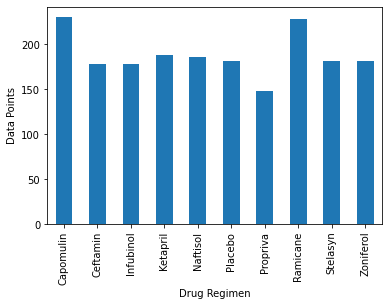

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.-change to total mice 
data_points2=clean_df.groupby('Drug Regimen')
count_drugs=data_points2['Drug Regimen'].count()
count_drugs
count_chart=count_drugs.plot(kind='bar')
count_chart.set_xlabel('Drug Regimen')
count_chart.set_ylabel('Data Points')
plt.show()
plt.tight_layout()


<function matplotlib.pyplot.show(close=None, block=None)>

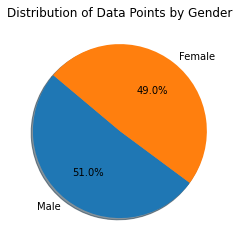

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender=clean_df['Sex'].value_counts()
plt.pie(mouse_gender.values, labels=mouse_gender.index, 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Distribution of Data Points by Gender")
plt.savefig("../images/data_points_by_gender.png")
plt.show


Text(0.5, 1.0, 'Data Points by Gender')

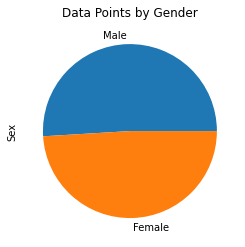

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender.plot(kind="pie")
plt.title("Data Points by Gender")



## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

mice_final_TV = clean_df.drop_duplicates(subset='Mouse ID', keep="last")



# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# mine- how many mice reached final treatment?




In [34]:
# Put treatments into a list for for loop (and later for plot labels)
regimens= ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

#Capomulin
Capomulin=mice_final_TV.loc[mice_final_TV['Drug Regimen']=="Capomulin"]
Capomulin=Capomulin['Tumor Volume (mm3)']
Capomulin.to_frame()

quartiles = Capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
Capomulin.head()
#outliers = Capomulin.loc[('Tumor Volume (mm3)' < lower_bound) | ('Tumor Volume (mm3)' > upper_bound)]
#outliers
#print(f"Outliers for {Capomulin} are {outliers}")

#Ramicane
Ramicane=mice_final_TV.loc[mice_final_TV['Drug Regimen']=="Ramicane"]
Ramicane=Ramicane['Tumor Volume (mm3)']
Ramicane.to_frame()

quartiles = Ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
Ramicane.head()
#outliers = Capomulin.loc[('Tumor Volume (mm3)' < lower_bound) | ('Tumor Volume (mm3)' > upper_bound)]
#outliers
#print(f"Outliers for {Capomulin} are {outliers}")
    
    

424     43.166373
734     44.183451
1312    43.419381
1352    38.342008
1498    36.561652
Name: Tumor Volume (mm3), dtype: float64

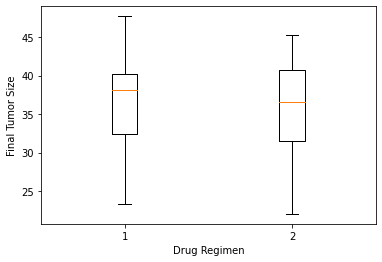

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
#ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Final Tumor Size')
ax1.set_xlabel('Drug Regimen')
#ax1.boxplot(Capomulin)
ax1.boxplot([Capomulin,Ramicane])

plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
